# <h1 style="background-color:#4B2E05; padding:15px; font-weight:700; text-align:center; color:#FFF9F4; border-left:5px solid #D4A373; border-right:5px solid #D4A373;">Credit Worthiness Assessment</h1>
<p style="text-align:center; color:#7B4B2A; font-size:16px; margin-top:10px;">Machine Learning Pipeline for Loan Default Prediction</p>

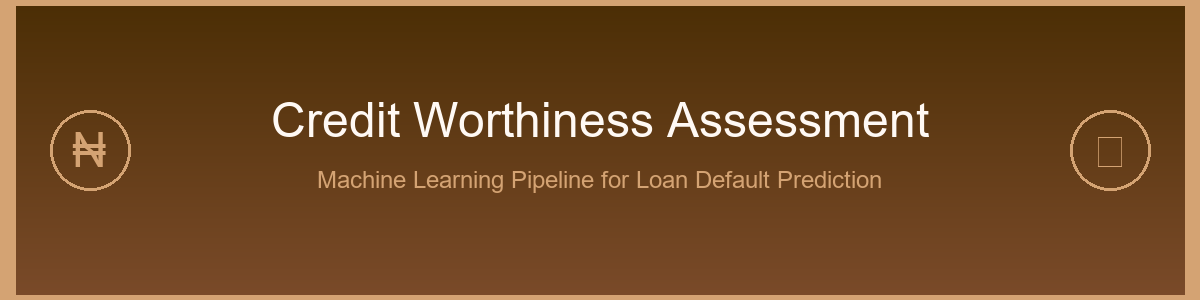

In [62]:
from IPython.display import Image, display

# Display the banner
display(Image(filename='credit_banner.png'))

## <h2 style="background-color:#4B2E05; padding:10px; font-weight:700; margin:0; color:#FFF9F4;">Phase 1A: Data Loading & Basic Exploration</h2>

In [63]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')

# Custom color palette (matching frontend)
COLORS = {
    'deep_coffee': '#4B2E05',
    'medium_brown': '#7B4B2A',
    'light_tan': '#CBB193',
    'cream_bg': '#F5EDE0',
    'off_white': '#FFF9F4',
    'muted_gold': '#D4A373',
    'text_dark': '#3C2A21'
}

# Color combinations for charts
PRIMARY = COLORS['deep_coffee']
SECONDARY = COLORS['medium_brown']
ACCENT = COLORS['muted_gold']
LIGHT = COLORS['light_tan']
BG = COLORS['cream_bg']

# Palette for multiple categories
PALETTE = [PRIMARY, ACCENT, SECONDARY, LIGHT, COLORS['text_dark']]
sns.set_palette(PALETTE)

# For default vs no-default charts
DEFAULT_COLORS = [ACCENT, PRIMARY]  # No Default (gold), Default (coffee)

%matplotlib inline

In [64]:
# Load data
df = pd.read_csv('../data.csv')
print(f"Data loaded successfully!")

Data loaded successfully!


In [65]:
# Check shape
print(f"Dataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")

Dataset Shape: 20000 rows, 20 columns


In [66]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   age                              20000 non-null  int64 
 1   gender                           20000 non-null  object
 2   employment_status                20000 non-null  object
 3   state_of_residence               20000 non-null  object
 4   total_monthly_inflow             20000 non-null  int64 
 5   total_monthly_outflow            20000 non-null  int64 
 6   transaction_frequency            20000 non-null  int64 
 7   salary_payment_detected          20000 non-null  object
 8   end_of_month_balance             20000 non-null  int64 
 9   highest_credit_amount            20000 non-null  int64 
 10  highest_debit_amount             20000 non-null  int64 
 11  gambling_transactions_count      20000 non-null  int64 
 12  loan_related_transactions_count 

In [67]:
# View first 10 rows
df.head(10)

,age,gender,employment_status,state_of_residence,total_monthly_inflow,total_monthly_outflow,transaction_frequency,salary_payment_detected,end_of_month_balance,highest_credit_amount,highest_debit_amount,gambling_transactions_count,loan_related_transactions_count,previous_loan_taken,previous_loan_amount,repayment_status,missed_payment_count,airtime_spend_per_month,data_subscription_spend,loan_defaulted
0,28,Male,Employed,Plateau,424507,359302,32,Yes,97144,160467,94280,0,2,No,0,NaN,0,7158,7302,0
1,24,Female,Employed,Enugu,280487,161577,28,Yes,233366,144723,51137,0,0,No,0,NaN,0,1974,5942,0
2,34,Male,Self-employed,Rivers,543816,299054,31,No,357324,324227,65367,0,0,Yes,2195779,On-time,0,2799,7842,0
3,21,Female,Employed,Cross River,196767,122742,32,Yes,100214,148492,37253,0,0,Yes,848579,Late,0,4417,500,0
4,28,Male,Employed,Kaduna,460769,240578,37,Yes,275467,148650,79422,0,1,No,0,NaN,0,1042,2840,0
5,40,Male,Self-employed,Cross River,341851,182969,8,No,323277,115297,108821,0,0,No,0,NaN,0,2646,6835,0
6,38,Male,Employed,Imo,224117,160417,30,Yes,195893,104315,36161,0,1,No,0,NaN,0,1787,1411,0
7,28,Female,Employed,Delta,339198,245551,50,Yes,130743,230787,104239,0,0,Yes,1646750,Late,2,10744,2238,1
8,30,Female,Self-employed,Plateau,50000,31357,50,No,202004,21232,11418,0,0,No,0,NaN,0,2421,7231,0
9,29,Male,Employed,Oyo,425217,371763,52,No,94619,167231,207080,0,1,No,0,NaN,0,6743,5526,0


In [68]:
# View last 10 rows
df.tail(10)

,age,gender,employment_status,state_of_residence,total_monthly_inflow,total_monthly_outflow,transaction_frequency,salary_payment_detected,end_of_month_balance,highest_credit_amount,highest_debit_amount,gambling_transactions_count,loan_related_transactions_count,previous_loan_taken,previous_loan_amount,repayment_status,missed_payment_count,airtime_spend_per_month,data_subscription_spend,loan_defaulted
19990,18,Male,Self-employed,Edo,403502,361798,20,No,69962,285796,163670,0,1,Yes,1947978,Late,3,8612,1588,1
19991,26,Female,Self-employed,Oyo,285241,192363,30,No,210091,184007,78213,0,1,No,0,NaN,0,4461,10834,0
19992,33,Male,Employed,Borno,599366,493649,32,Yes,129094,265200,177578,0,4,Yes,1043218,Late,1,7633,6116,0
19993,30,Male,Employed,Enugu,394098,337665,33,Yes,33184,252347,159744,0,3,Yes,2008061,On-time,3,500,5774,1
19994,25,Female,Employed,Akwa Ibom,362976,237857,35,Yes,170946,243838,84627,0,0,Yes,1320506,Late,0,5466,5120,0
19995,28,Female,Employed,Bauchi,328515,210746,35,Yes,180861,173764,69558,0,0,No,0,NaN,0,773,6086,0
19996,21,Male,Self-employed,Anambra,50000,44767,42,Yes,28659,39150,9290,0,3,No,0,NaN,0,1131,8244,0
19997,29,Male,Employed,Abuja,615785,494639,35,Yes,133805,395271,180073,0,2,No,0,NaN,0,3227,4682,0
19998,35,Male,Employed,Edo,243298,212751,27,Yes,38314,188750,95094,0,3,Yes,613979,On-time,1,7044,6010,0
19999,28,Male,Employed,Rivers,515671,262305,28,Yes,274224,364616,97326,0,1,Yes,2816606,On-time,0,3420,5483,0


In [69]:
# Statistical summary
df.describe()

,age,total_monthly_inflow,total_monthly_outflow,transaction_frequency,end_of_month_balance,highest_credit_amount,highest_debit_amount,gambling_transactions_count,loan_related_transactions_count,previous_loan_amount,missed_payment_count,airtime_spend_per_month,data_subscription_spend,loan_defaulted
count,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000
mean,31.67535,299073.369350,213733.730750,34.603000,153225.223300,164931.252100,85710.214050,0.720800,0.97385,5.324167e+05,0.535150,4002.976300,5115.301400,0.333850
std,7.70228,170297.135719,127838.142833,14.737118,111812.291978,106258.147285,58908.224088,1.226712,1.23148,7.508804e+05,1.073835,1928.592389,2851.687678,0.471599
min,18.00000,10000.000000,10000.000000,5.000000,0.000000,3042.000000,2121.000000,0.000000,0.00000,0.000000e+00,0.000000,500.000000,500.000000,0.000000
25%,26.00000,160363.250000,109608.000000,24.000000,58519.750000,78410.000000,39209.250000,0.000000,0.00000,0.000000e+00,0.000000,2614.000000,3003.000000,0.000000
50%,32.00000,300930.500000,205646.000000,34.000000,141633.000000,153049.500000,75740.500000,0.000000,1.00000,1.331605e+05,0.000000,3968.000000,5028.000000,0.000000
75%,37.00000,420577.250000,295908.750000,45.000000,239172.750000,232275.000000,119604.750000,1.000000,2.00000,8.795368e+05,1.000000,5308.000000,7062.000000,1.000000
max,65.00000,999831.000000,899566.000000,100.000000,655479.000000,704504.000000,424179.000000,6.000000,5.00000,4.911297e+06,5.000000,11961.000000,16298.000000,1.000000


In [70]:
# Data types
df.dtypes

age                                 int64
gender                             object
employment_status                  object
state_of_residence                 object
total_monthly_inflow                int64
total_monthly_outflow               int64
transaction_frequency               int64
salary_payment_detected            object
end_of_month_balance                int64
highest_credit_amount               int64
highest_debit_amount                int64
gambling_transactions_count         int64
loan_related_transactions_count     int64
previous_loan_taken                object
previous_loan_amount                int64
repayment_status                   object
missed_payment_count                int64
airtime_spend_per_month             int64
data_subscription_spend             int64
loan_defaulted                      int64
dtype: object

In [71]:
# Missing values
missing = df.isnull().sum()
print("Missing Values:")
print(missing[missing > 0] if missing.sum() > 0 else "No missing values found!")

Missing Values:
repayment_status    9306
dtype: int64


In [72]:
# Duplicate rows
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

Duplicate rows: 0


In [73]:
# Unique values per column
df.nunique()

age                                   46
gender                                 2
employment_status                      3
state_of_residence                    20
total_monthly_inflow               18555
total_monthly_outflow              19446
transaction_frequency                 86
salary_payment_detected                2
end_of_month_balance               18140
highest_credit_amount              19391
highest_debit_amount               18917
gambling_transactions_count            7
loan_related_transactions_count        6
previous_loan_taken                    2
previous_loan_amount               10672
repayment_status                       2
missed_payment_count                   6
airtime_spend_per_month             6797
data_subscription_spend             8570
loan_defaulted                         2
dtype: int64

In [74]:
# Define column types for later use
numerical_cols = ['age', 'total_monthly_inflow', 'total_monthly_outflow', 
                  'transaction_frequency', 'end_of_month_balance',
                  'highest_credit_amount', 'highest_debit_amount',
                  'gambling_transactions_count', 'loan_related_transactions_count',
                  'previous_loan_amount', 'missed_payment_count',
                  'airtime_spend_per_month', 'data_subscription_spend']

categorical_cols = ['gender', 'employment_status', 'state_of_residence',
                    'salary_payment_detected', 'previous_loan_taken', 'repayment_status']

target_col = 'loan_defaulted'

print(f"Numerical features: {len(numerical_cols)}")
print(f"Categorical features: {len(categorical_cols)}")
print(f"Target: {target_col}")

Numerical features: 13
Categorical features: 6
Target: loan_defaulted


## <h2 style="background-color:#4B2E05; padding:10px; font-weight:700; margin:0; color:#FFF9F4;">Phase 1B: Univariate EDA</h2>

<h3 style="background-color:#7B4B2A; padding:8px 10px; font-weight:600; margin:0; color:#FFF9F4;">Target Variable Distribution</h3>

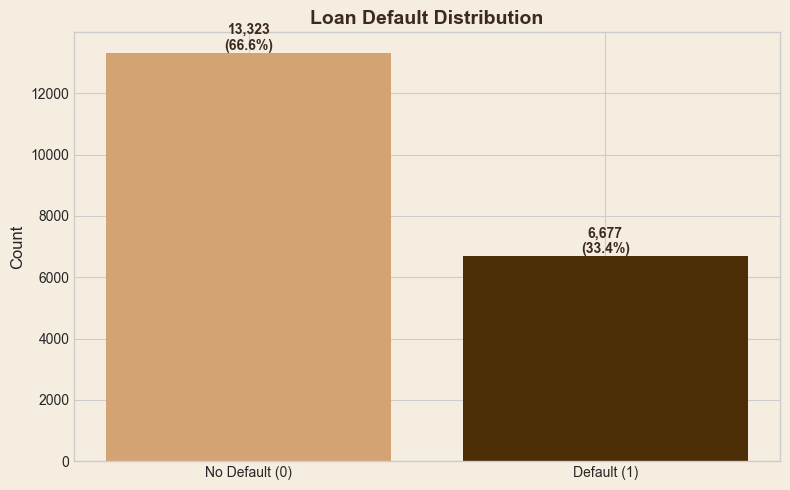


Class balance: 2.00:1 ratio


In [75]:
# Target distribution
fig, ax = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor(BG)
ax.set_facecolor(BG)

target_counts = df['loan_defaulted'].value_counts().sort_index()
bars = ax.bar(['No Default (0)', 'Default (1)'], target_counts.values, color=[ACCENT, PRIMARY])
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Loan Default Distribution', fontsize=14, fontweight='bold', color=COLORS['text_dark'])

# Add count and percentage labels
total = len(df)
for i, (bar, v) in enumerate(zip(bars, target_counts.values)):
    ax.text(bar.get_x() + bar.get_width()/2, v + 100, f'{v:,}\n({v/total*100:.1f}%)', 
            ha='center', fontweight='bold', color=COLORS['text_dark'])

plt.tight_layout()
plt.show()

print(f"\nClass balance: {target_counts[0]/target_counts[1]:.2f}:1 ratio")

<p style="background-color:#F5EDE0; padding:10px; margin:5px 0; border-left:4px solid #D4A373; color:#3C2A21;">
<strong>Insight:</strong> Moderately imbalanced dataset (2:1 ratio). Will need SMOTE or class weights during model training.
</p>

<h3 style="background-color:#7B4B2A; padding:8px 10px; font-weight:600; margin:0; color:#FFF9F4;">Numerical Features Distribution</h3>

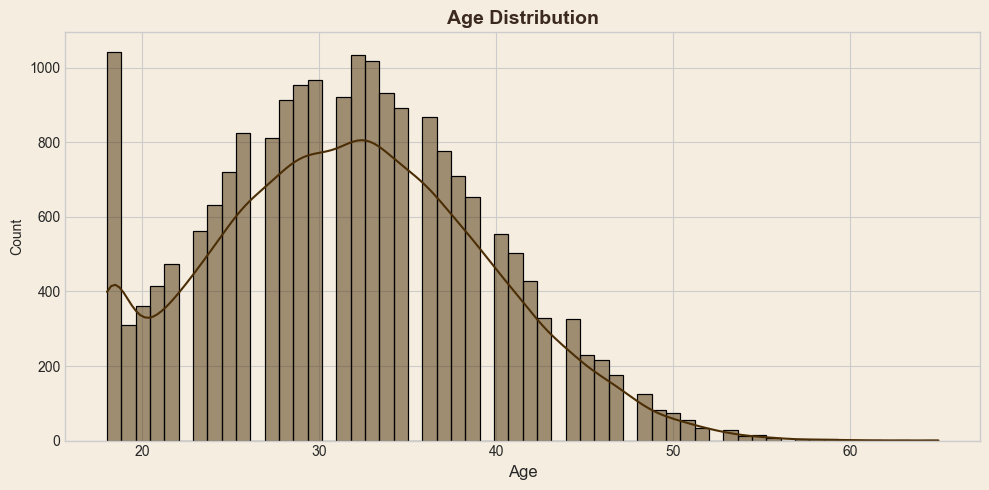

In [76]:
# Age distribution
fig, ax = plt.subplots(figsize=(10, 5))
fig.patch.set_facecolor(BG)
ax.set_facecolor(BG)

sns.histplot(data=df, x='age', kde=True, ax=ax, color=PRIMARY)
ax.set_title('Age Distribution', fontsize=14, fontweight='bold', color=COLORS['text_dark'])
ax.set_xlabel('Age', fontsize=12)
plt.tight_layout()
plt.show()

<p style="background-color:#F5EDE0; padding:10px; margin:5px 0; border-left:4px solid #D4A373; color:#3C2A21;">
<strong>Insight:</strong> Age is roughly normally distributed (18-65 years, peak around 30). No significant skew to address.
</p>

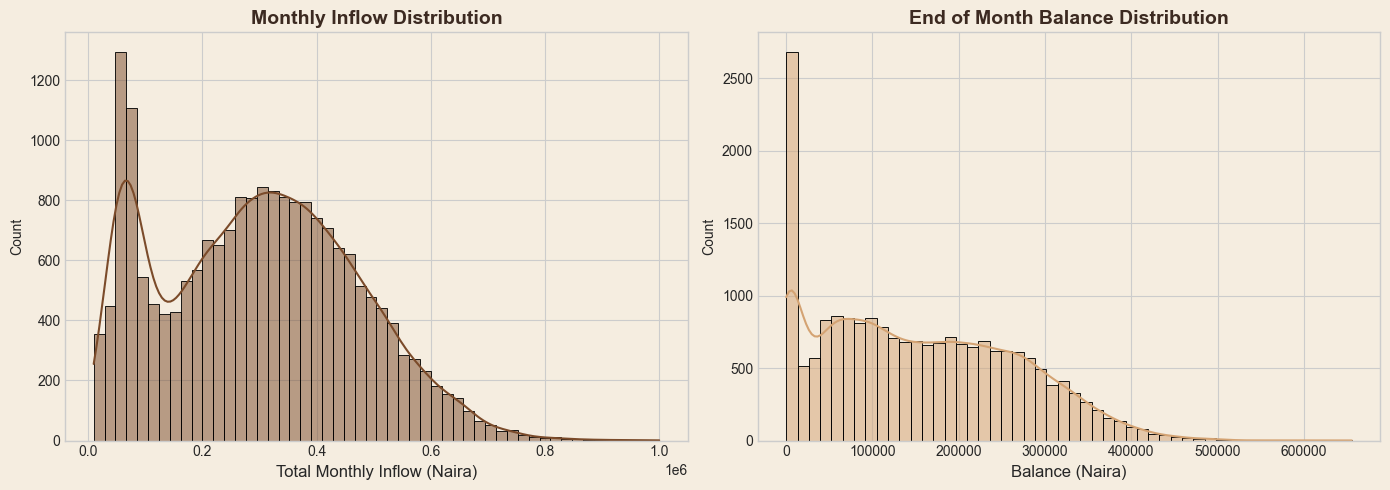

In [77]:
# Income & Balance distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.patch.set_facecolor(BG)

for ax in axes:
    ax.set_facecolor(BG)

sns.histplot(data=df, x='total_monthly_inflow', kde=True, ax=axes[0], color=SECONDARY)
axes[0].set_title('Monthly Inflow Distribution', fontsize=14, fontweight='bold', color=COLORS['text_dark'])
axes[0].set_xlabel('Total Monthly Inflow (Naira)', fontsize=12)

sns.histplot(data=df, x='end_of_month_balance', kde=True, ax=axes[1], color=ACCENT)
axes[1].set_title('End of Month Balance Distribution', fontsize=14, fontweight='bold', color=COLORS['text_dark'])
axes[1].set_xlabel('Balance (Naira)', fontsize=12)

plt.tight_layout()
plt.show()

<p style="background-color:#F5EDE0; padding:10px; margin:5px 0; border-left:4px solid #D4A373; color:#3C2A21;">
<strong>Insight:</strong> Both income and balance show right-skewed distributions. Higher earners tend to maintain higher balances.
</p>

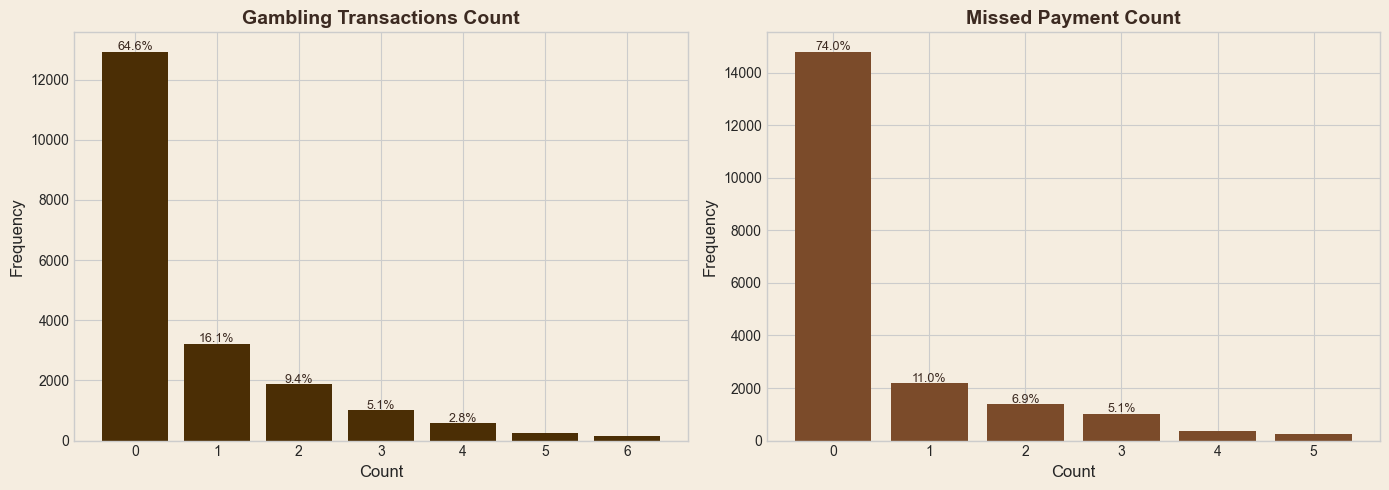

In [78]:
# Gambling & Missed payments distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.patch.set_facecolor(BG)

for ax in axes:
    ax.set_facecolor(BG)

# Gambling transactions
gambling_counts = df['gambling_transactions_count'].value_counts().sort_index()
bars1 = axes[0].bar(gambling_counts.index, gambling_counts.values, color=PRIMARY)
axes[0].set_title('Gambling Transactions Count', fontsize=14, fontweight='bold', color=COLORS['text_dark'])
axes[0].set_xlabel('Count', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# Add percentages
total = len(df)
for bar, v in zip(bars1, gambling_counts.values):
    if v > total * 0.02:  # Only show label if > 2%
        axes[0].text(bar.get_x() + bar.get_width()/2, v + 50, f'{v/total*100:.1f}%', 
                     ha='center', fontsize=9, color=COLORS['text_dark'])

# Missed payments
missed_counts = df['missed_payment_count'].value_counts().sort_index()
bars2 = axes[1].bar(missed_counts.index, missed_counts.values, color=SECONDARY)
axes[1].set_title('Missed Payment Count', fontsize=14, fontweight='bold', color=COLORS['text_dark'])
axes[1].set_xlabel('Count', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

# Add percentages
for bar, v in zip(bars2, missed_counts.values):
    if v > total * 0.02:
        axes[1].text(bar.get_x() + bar.get_width()/2, v + 50, f'{v/total*100:.1f}%', 
                     ha='center', fontsize=9, color=COLORS['text_dark'])

plt.tight_layout()
plt.show()

<p style="background-color:#F5EDE0; padding:10px; margin:5px 0; border-left:4px solid #D4A373; color:#3C2A21;">
<strong>Insight:</strong> Majority have zero gambling/missed payments. These are strong risk indicators - even small counts may signal higher default risk.
</p>

<h3 style="background-color:#7B4B2A; padding:8px 10px; font-weight:600; margin:0; color:#FFF9F4;">Categorical Features Distribution</h3>

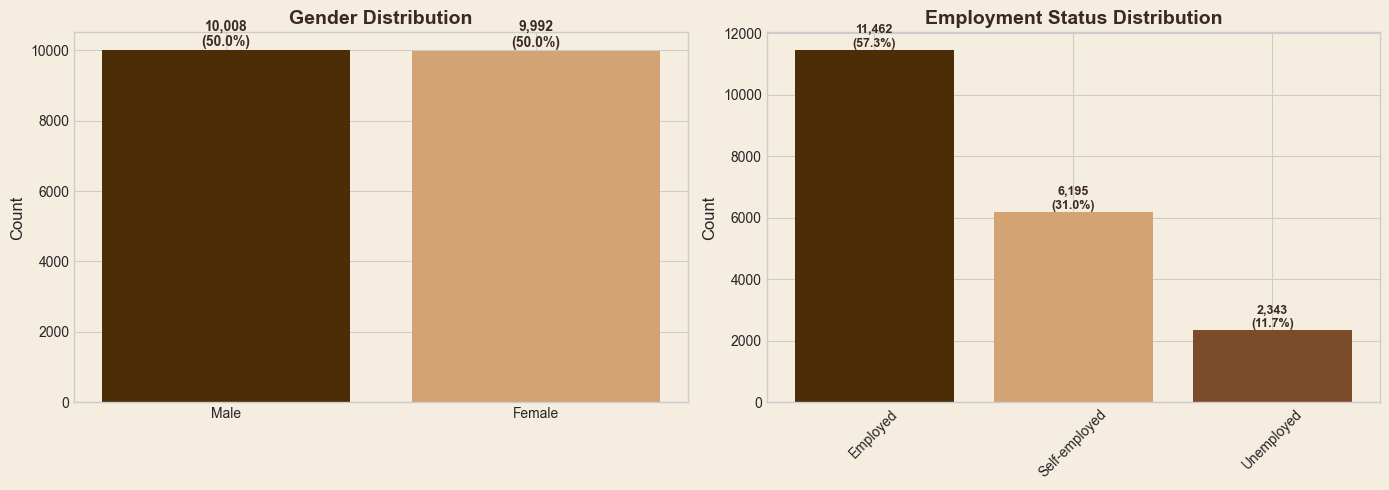

In [79]:
# Gender & Employment distribution with percentages
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.patch.set_facecolor(BG)

for ax in axes:
    ax.set_facecolor(BG)

total = len(df)

# Gender distribution
gender_counts = df['gender'].value_counts()
bars1 = axes[0].bar(gender_counts.index, gender_counts.values, color=[PRIMARY, ACCENT])
axes[0].set_title('Gender Distribution', fontsize=14, fontweight='bold', color=COLORS['text_dark'])
axes[0].set_ylabel('Count', fontsize=12)

for bar, v in zip(bars1, gender_counts.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, v + 100, f'{v:,}\n({v/total*100:.1f}%)', 
                 ha='center', fontweight='bold', fontsize=10, color=COLORS['text_dark'])

# Employment distribution
emp_counts = df['employment_status'].value_counts()
bars2 = axes[1].bar(emp_counts.index, emp_counts.values, color=[PRIMARY, ACCENT, SECONDARY, LIGHT])
axes[1].set_title('Employment Status Distribution', fontsize=14, fontweight='bold', color=COLORS['text_dark'])
axes[1].set_ylabel('Count', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

for bar, v in zip(bars2, emp_counts.values):
    axes[1].text(bar.get_x() + bar.get_width()/2, v + 100, f'{v:,}\n({v/total*100:.1f}%)', 
                 ha='center', fontweight='bold', fontsize=9, color=COLORS['text_dark'])

plt.tight_layout()
plt.show()

<p style="background-color:#F5EDE0; padding:10px; margin:5px 0; border-left:4px solid #D4A373; color:#3C2A21;">
<strong>Insight:</strong> Balanced gender distribution. Employment dominated by Employed (~50%), followed by Self-employed and Unemployed.
</p>

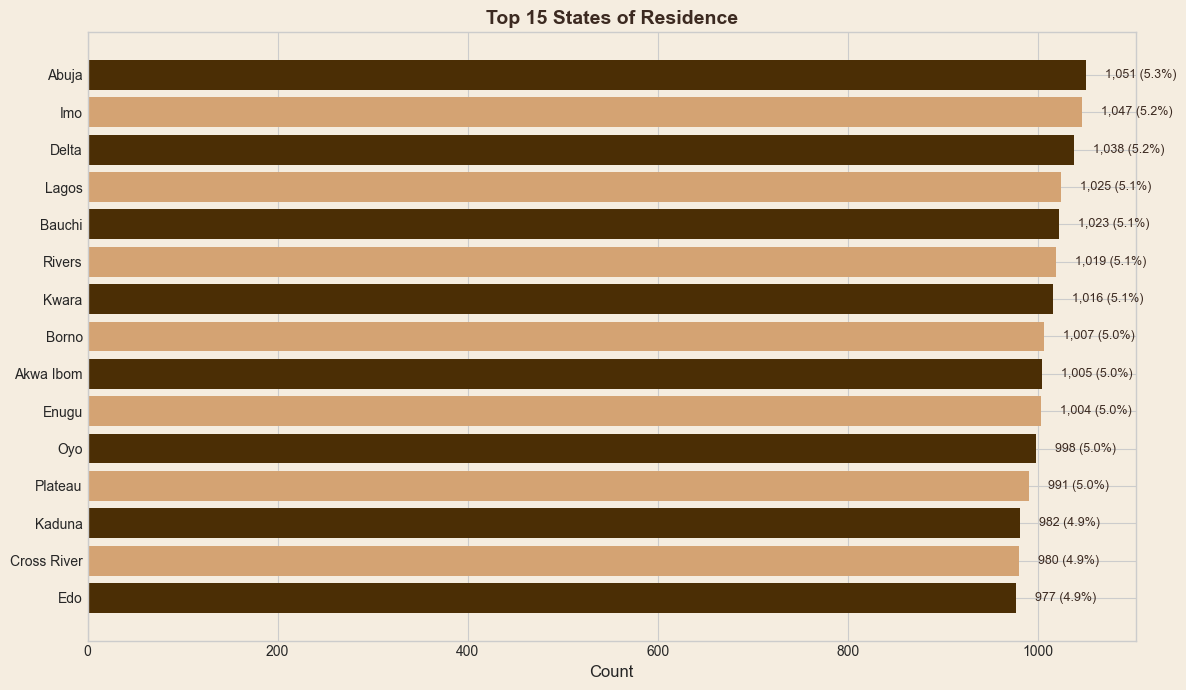

In [80]:
# State distribution (top 15) with percentages
fig, ax = plt.subplots(figsize=(12, 7))
fig.patch.set_facecolor(BG)
ax.set_facecolor(BG)

total = len(df)
state_counts = df['state_of_residence'].value_counts().head(15)

# Create gradient colors
colors = [PRIMARY if i % 2 == 0 else ACCENT for i in range(len(state_counts))]
bars = ax.barh(state_counts.index[::-1], state_counts.values[::-1], color=colors[::-1])

ax.set_title('Top 15 States of Residence', fontsize=14, fontweight='bold', color=COLORS['text_dark'])
ax.set_xlabel('Count', fontsize=12)

# Add percentages
for bar, v in zip(bars, state_counts.values[::-1]):
    ax.text(v + 20, bar.get_y() + bar.get_height()/2, f'{v:,} ({v/total*100:.1f}%)', 
            va='center', fontsize=9, color=COLORS['text_dark'])

plt.tight_layout()
plt.show()

<p style="background-color:#F5EDE0; padding:10px; margin:5px 0; border-left:4px solid #D4A373; color:#3C2A21;">
<strong>Insight:</strong> Good geographic diversity across Nigerian states. Lagos likely leads - consider regional economic factors.
</p>

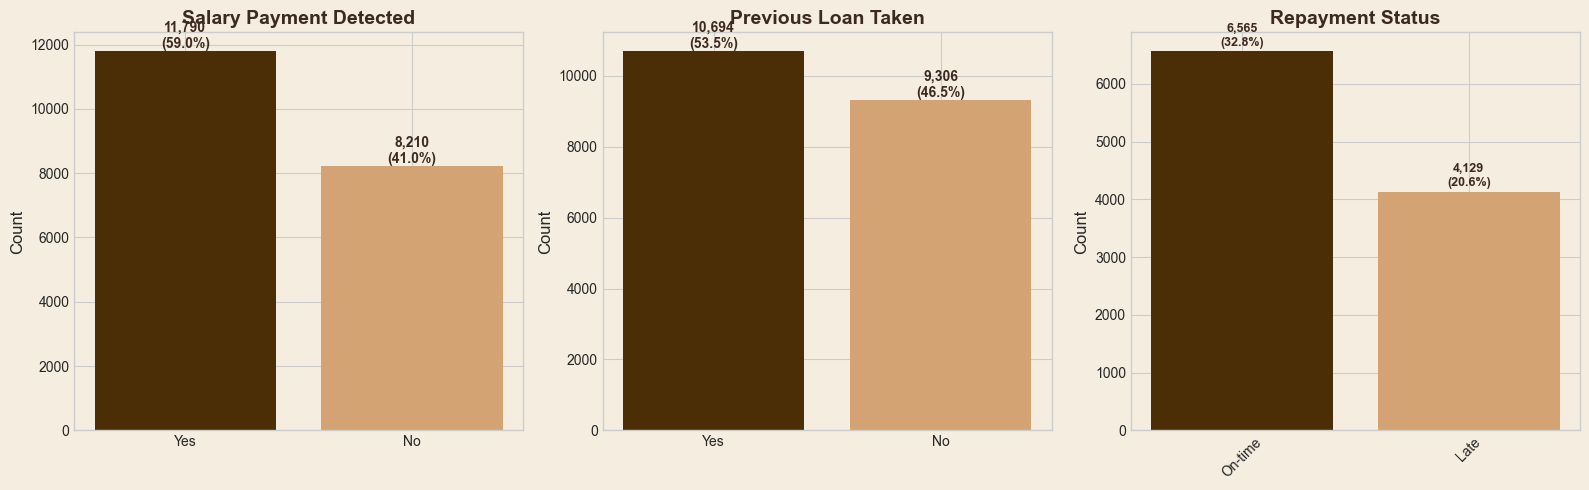

In [81]:
# Salary & Loan history distribution with percentages
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.patch.set_facecolor(BG)

for ax in axes:
    ax.set_facecolor(BG)

total = len(df)

# Salary payment detected
salary_counts = df['salary_payment_detected'].value_counts()
bars1 = axes[0].bar(salary_counts.index, salary_counts.values, color=[PRIMARY, ACCENT])
axes[0].set_title('Salary Payment Detected', fontsize=14, fontweight='bold', color=COLORS['text_dark'])
axes[0].set_ylabel('Count', fontsize=12)

for bar, v in zip(bars1, salary_counts.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, v + 100, f'{v:,}\n({v/total*100:.1f}%)', 
                 ha='center', fontweight='bold', fontsize=10, color=COLORS['text_dark'])

# Previous loan taken
loan_counts = df['previous_loan_taken'].value_counts()
bars2 = axes[1].bar(loan_counts.index, loan_counts.values, color=[PRIMARY, ACCENT])
axes[1].set_title('Previous Loan Taken', fontsize=14, fontweight='bold', color=COLORS['text_dark'])
axes[1].set_ylabel('Count', fontsize=12)

for bar, v in zip(bars2, loan_counts.values):
    axes[1].text(bar.get_x() + bar.get_width()/2, v + 100, f'{v:,}\n({v/total*100:.1f}%)', 
                 ha='center', fontweight='bold', fontsize=10, color=COLORS['text_dark'])

# Repayment status
repay_counts = df['repayment_status'].value_counts()
bars3 = axes[2].bar(repay_counts.index, repay_counts.values, color=[PRIMARY, ACCENT, SECONDARY, LIGHT])
axes[2].set_title('Repayment Status', fontsize=14, fontweight='bold', color=COLORS['text_dark'])
axes[2].set_ylabel('Count', fontsize=12)
axes[2].tick_params(axis='x', rotation=45)

for bar, v in zip(bars3, repay_counts.values):
    axes[2].text(bar.get_x() + bar.get_width()/2, v + 100, f'{v:,}\n({v/total*100:.1f}%)', 
                 ha='center', fontweight='bold', fontsize=9, color=COLORS['text_dark'])

plt.tight_layout()
plt.show()

<p style="background-color:#F5EDE0; padding:10px; margin:5px 0; border-left:4px solid #D4A373; color:#3C2A21;">
<strong>Insight:</strong> ~50% have previous loans. Late repayments dominate over on-time - a concerning pattern for lenders.
</p>

<h3 style="background-color:#7B4B2A; padding:8px 10px; font-weight:600; margin:0; color:#FFF9F4;">Outlier Detection</h3>

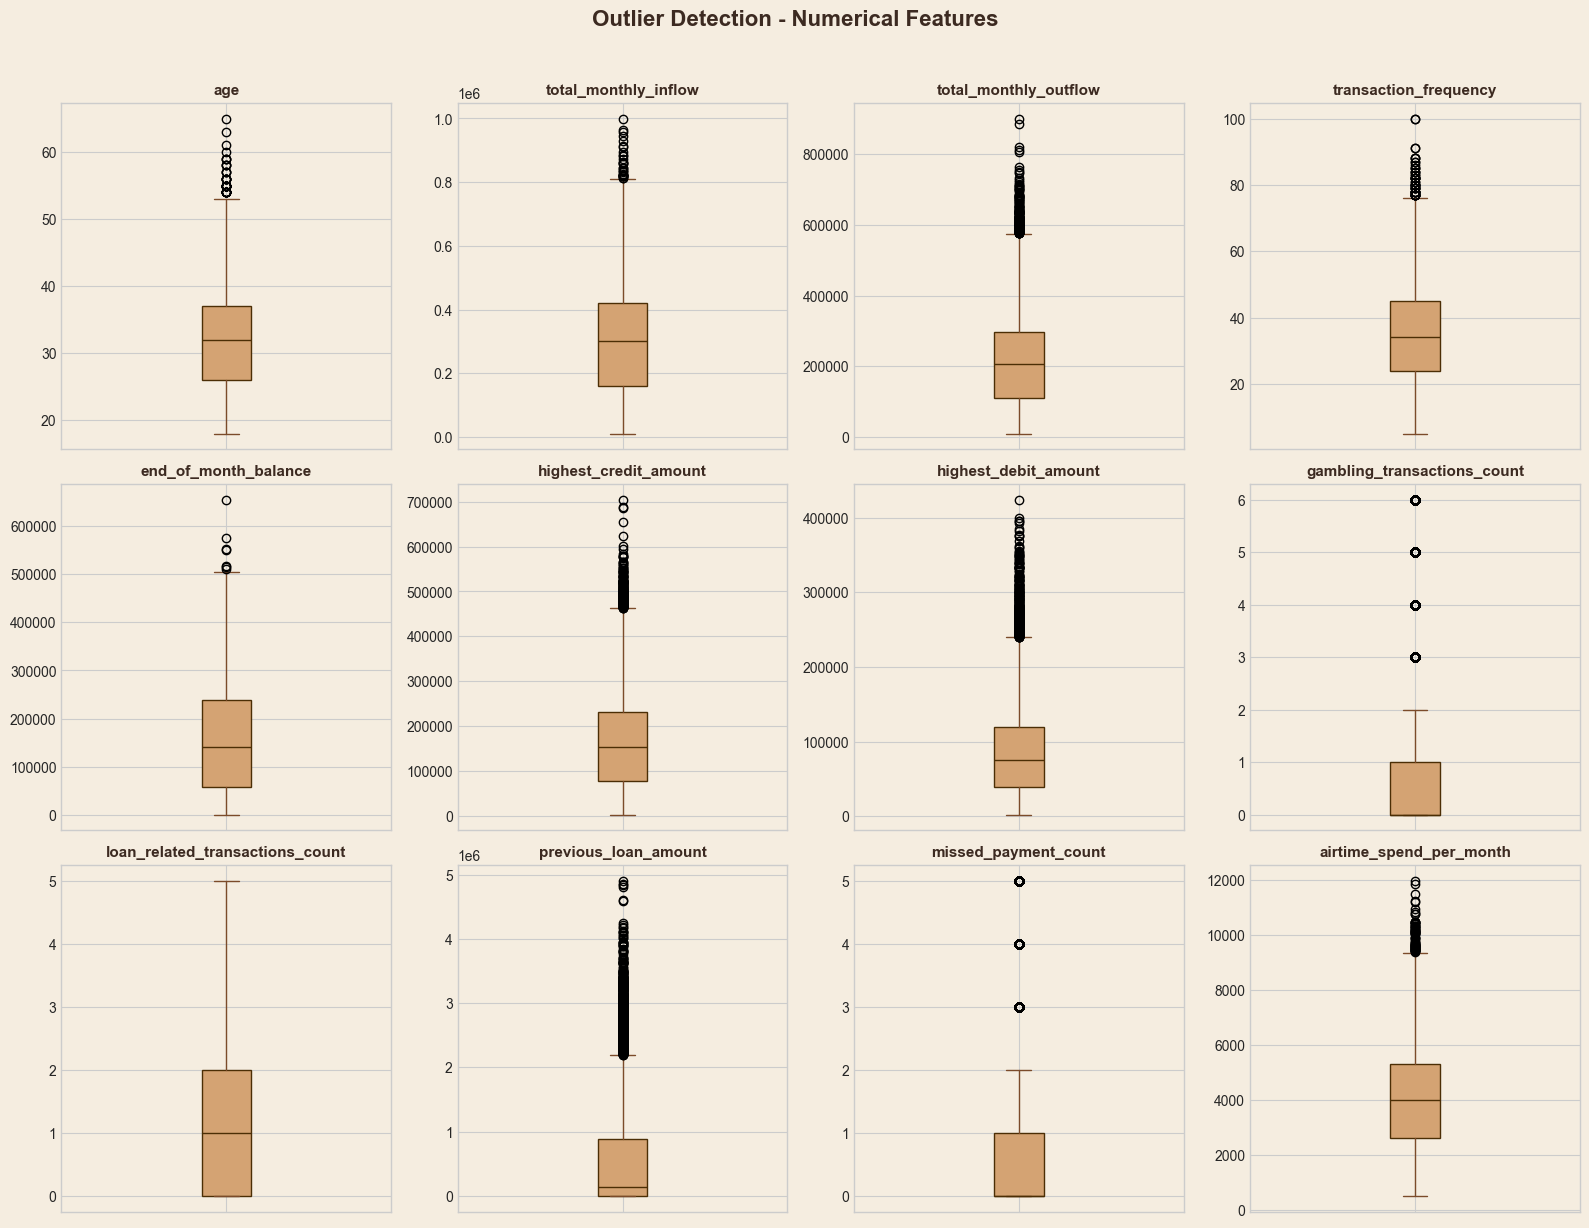

In [82]:
# Box plots for numerical features
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
fig.patch.set_facecolor(BG)
axes = axes.flatten()

for i, col in enumerate(numerical_cols[:12]):
    axes[i].set_facecolor(BG)
    box = axes[i].boxplot(df[col].dropna(), patch_artist=True)
    box['boxes'][0].set_facecolor(ACCENT)
    box['boxes'][0].set_edgecolor(PRIMARY)
    box['medians'][0].set_color(PRIMARY)
    box['whiskers'][0].set_color(SECONDARY)
    box['whiskers'][1].set_color(SECONDARY)
    box['caps'][0].set_color(SECONDARY)
    box['caps'][1].set_color(SECONDARY)
    axes[i].set_title(col, fontsize=11, fontweight='bold', color=COLORS['text_dark'])
    axes[i].set_xticklabels([])

plt.suptitle('Outlier Detection - Numerical Features', fontsize=16, fontweight='bold', color=COLORS['text_dark'], y=1.02)
plt.tight_layout()
plt.show()

<p style="background-color:#F5EDE0; padding:10px; margin:5px 0; border-left:4px solid #D4A373; color:#3C2A21;">
<strong>Insight:</strong> Outliers present in most financial features. Consider capping or transformation rather than removal.
</p>

## <h2 style="background-color:#4B2E05; padding:10px; font-weight:700; margin:0; color:#FFF9F4;">Phase 1C: Bivariate EDA</h2>

<h3 style="background-color:#7B4B2A; padding:8px 10px; font-weight:600; margin:0; color:#FFF9F4;">Correlation Matrix</h3>

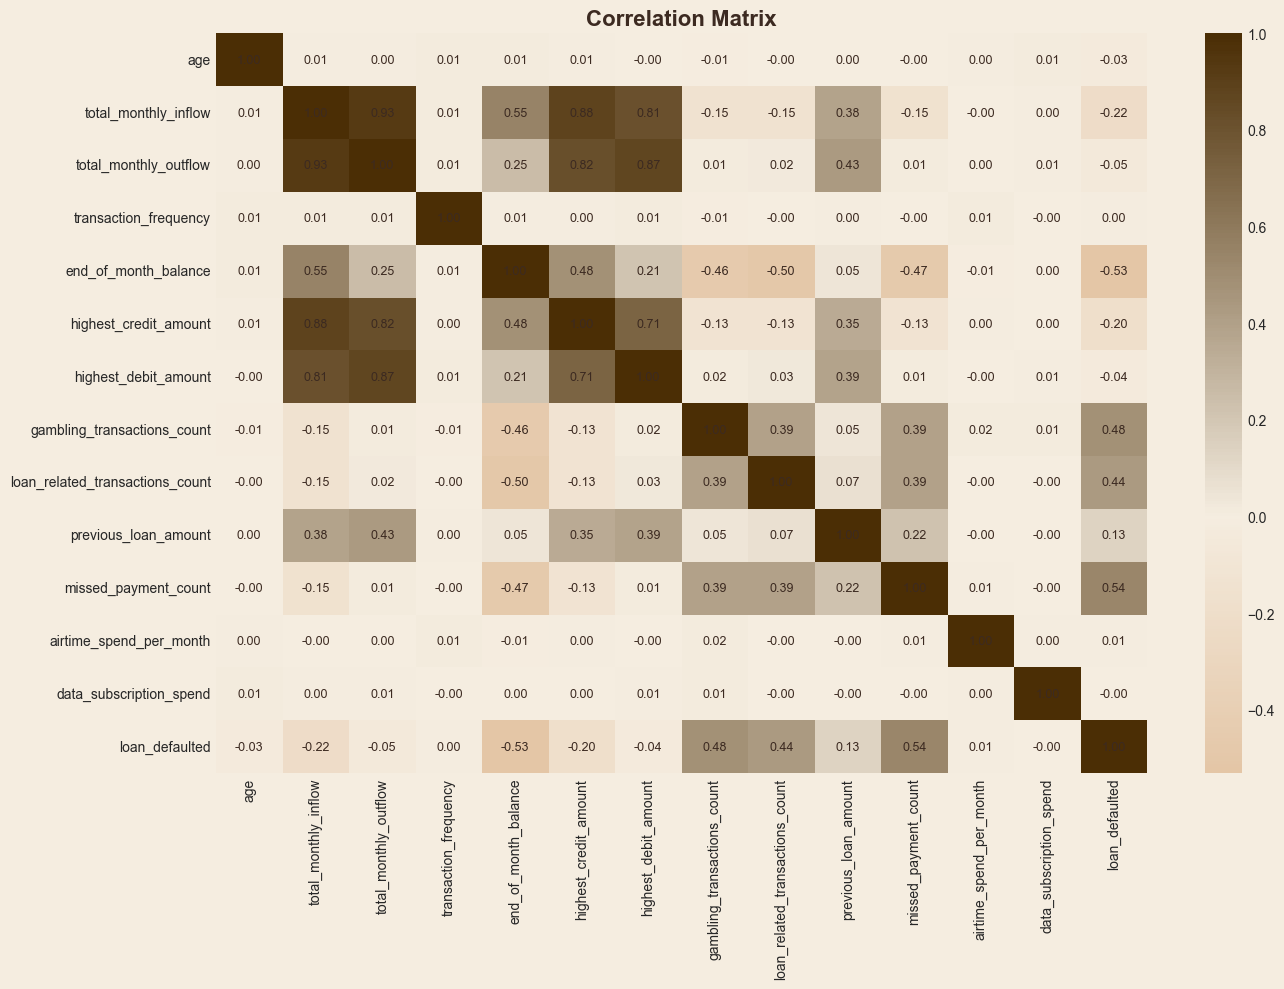

In [83]:
# Correlation heatmap
fig, ax = plt.subplots(figsize=(14, 10))
fig.patch.set_facecolor(BG)
ax.set_facecolor(BG)

corr_matrix = df[numerical_cols + [target_col]].corr()

# Custom colormap using our colors
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('custom', [ACCENT, BG, PRIMARY])

sns.heatmap(corr_matrix, annot=True, cmap=cmap, center=0, fmt='.2f', ax=ax,
            annot_kws={'size': 9, 'color': COLORS['text_dark']})
ax.set_title('Correlation Matrix', fontsize=16, fontweight='bold', color=COLORS['text_dark'])
plt.tight_layout()
plt.show()

In [84]:
# Correlations with target
target_corr = corr_matrix[target_col].drop(target_col).sort_values(key=abs, ascending=False)
print("Correlation with loan_defaulted:")
print(target_corr)

Correlation with loan_defaulted:
missed_payment_count               0.536322
end_of_month_balance              -0.531249
gambling_transactions_count        0.482484
loan_related_transactions_count    0.435104
total_monthly_inflow              -0.221696
highest_credit_amount             -0.195022
previous_loan_amount               0.134124
total_monthly_outflow             -0.048358
highest_debit_amount              -0.037315
age                               -0.034446
airtime_spend_per_month            0.005238
transaction_frequency              0.002409
data_subscription_spend           -0.001536
Name: loan_defaulted, dtype: float64


<p style="background-color:#F5EDE0; padding:10px; margin:5px 0; border-left:4px solid #D4A373; color:#3C2A21;">
<strong>Insight:</strong> Clear separation visible. Defaulters have lower balance, higher gambling count, and more missed payments.
</p>

<h3 style="background-color:#7B4B2A; padding:8px 10px; font-weight:600; margin:0; color:#FFF9F4;">Numerical Features vs Default</h3>

C:\Users\USER\AppData\Local\Temp\ipykernel_21840\2812998114.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([df[df['loan_defaulted']==0][col].dropna(),
C:\Users\USER\AppData\Local\Temp\ipykernel_21840\2812998114.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([df[df['loan_defaulted']==0][col].dropna(),
C:\Users\USER\AppData\Local\Temp\ipykernel_21840\2812998114.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([df[df['loan_defaulted']==0][col].dropna(),
C:\Users\USER\AppData\Local\Temp\ipykernel_21840\2812998114.py:13: MatplotlibDeprecationWarning: The 'labe

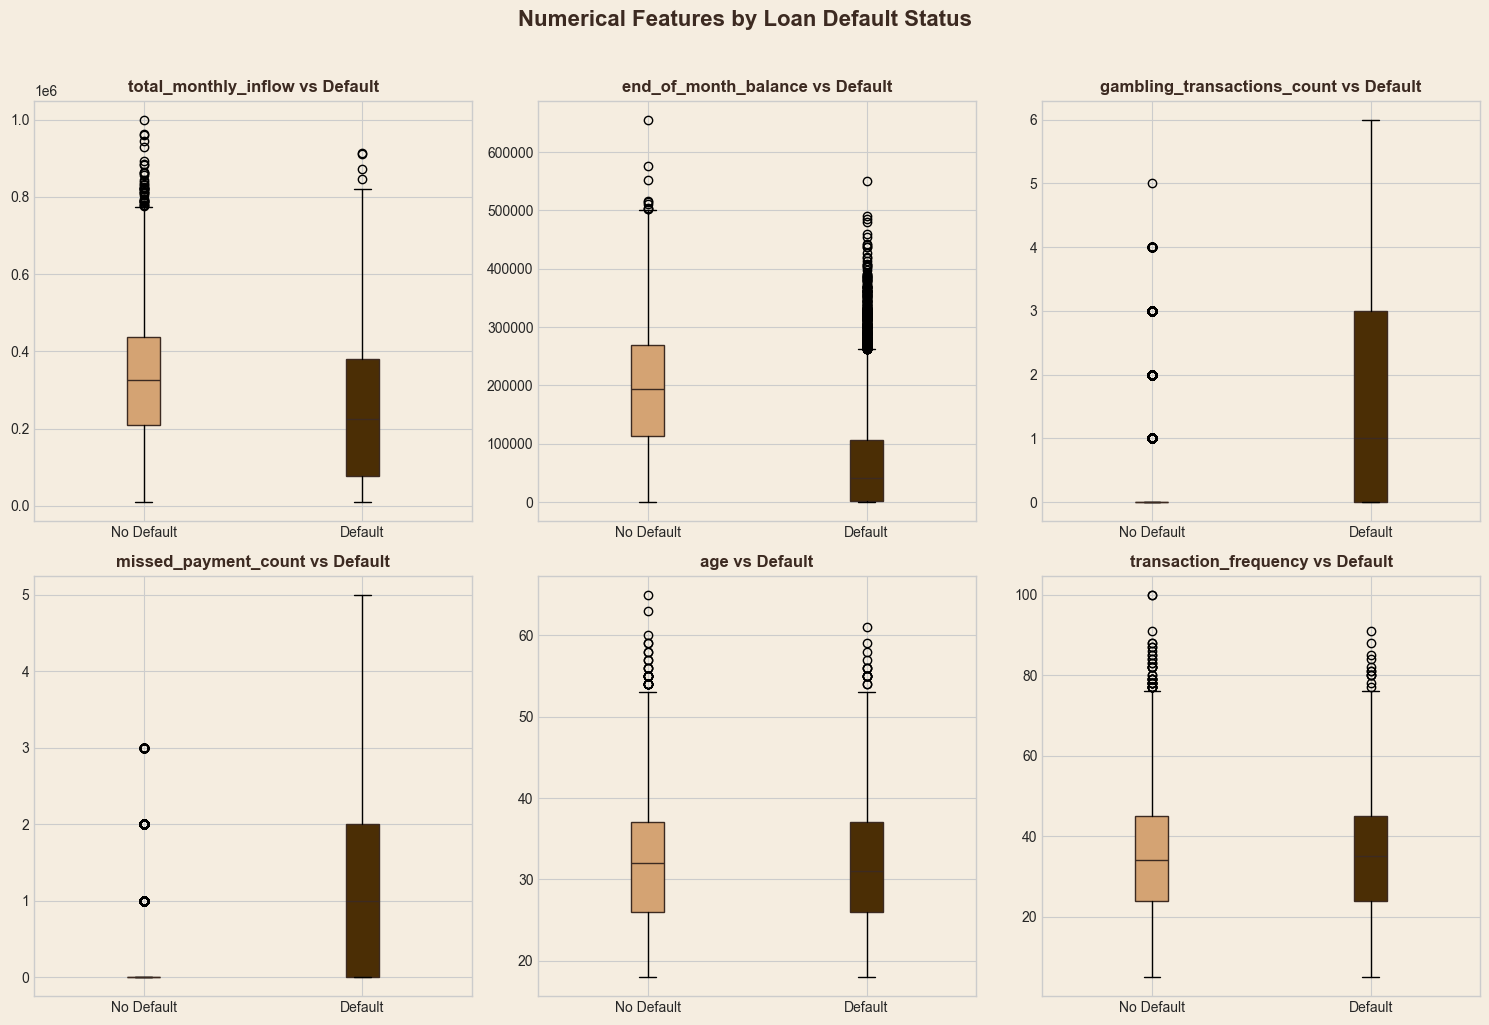

In [85]:
# Key numerical features vs Default
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.patch.set_facecolor(BG)

features = ['total_monthly_inflow', 'end_of_month_balance', 'gambling_transactions_count',
            'missed_payment_count', 'age', 'transaction_frequency']

for i, col in enumerate(features):
    row, col_idx = i // 3, i % 3
    ax = axes[row, col_idx]
    ax.set_facecolor(BG)
    
    bp = ax.boxplot([df[df['loan_defaulted']==0][col].dropna(), 
                     df[df['loan_defaulted']==1][col].dropna()],
                    patch_artist=True, labels=['No Default', 'Default'])
    
    bp['boxes'][0].set_facecolor(ACCENT)
    bp['boxes'][1].set_facecolor(PRIMARY)
    for box in bp['boxes']:
        box.set_edgecolor(COLORS['text_dark'])
    for median in bp['medians']:
        median.set_color(COLORS['text_dark'])
    
    ax.set_title(f'{col} vs Default', fontsize=12, fontweight='bold', color=COLORS['text_dark'])

plt.suptitle('Numerical Features by Loan Default Status', fontsize=16, fontweight='bold', color=COLORS['text_dark'], y=1.02)
plt.tight_layout()
plt.show()

<p style="background-color:#F5EDE0; padding:10px; margin:5px 0; border-left:4px solid #D4A373; color:#3C2A21;">
<strong>Insight:</strong> Unemployed show highest default rate. Employment status is a meaningful predictor for the model.
</p>

<h3 style="background-color:#7B4B2A; padding:8px 10px; font-weight:600; margin:0; color:#FFF9F4;">Categorical Features vs Default</h3>

<p style="background-color:#F5EDE0; padding:10px; margin:5px 0; border-left:4px solid #D4A373; color:#3C2A21;">
<strong>Insight:</strong> Gender shows similar default rates. Salary detection shows slight difference - verified income may reduce risk.
</p>

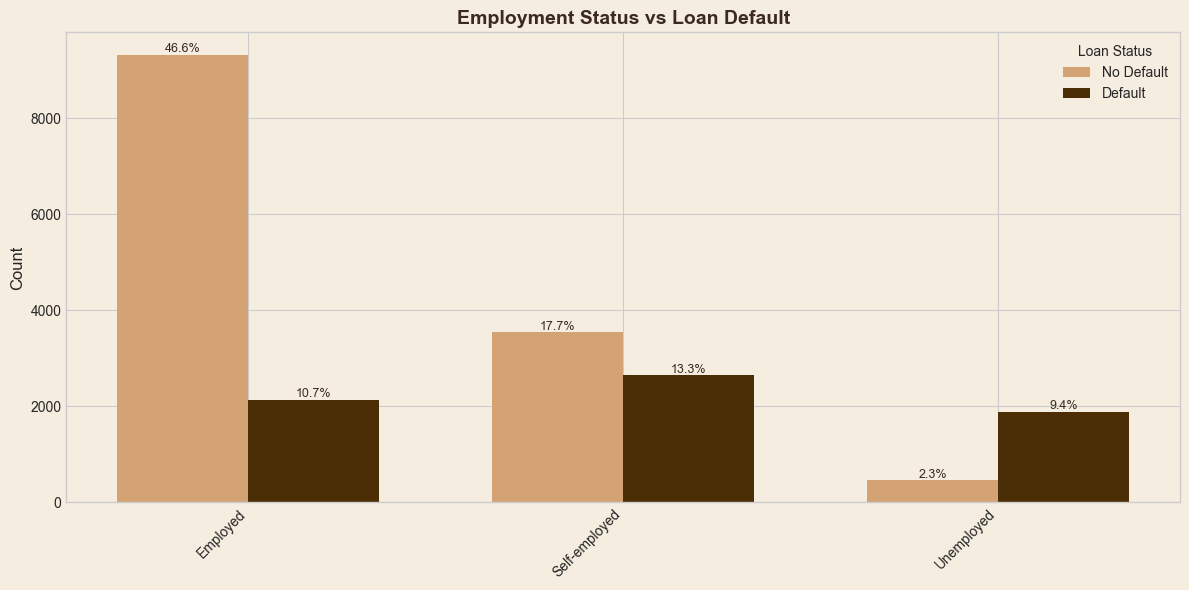

In [86]:
# Employment vs Default with percentages
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor(BG)
ax.set_facecolor(BG)

emp_default = df.groupby(['employment_status', 'loan_defaulted']).size().unstack(fill_value=0)
x = np.arange(len(emp_default.index))
width = 0.35

bars1 = ax.bar(x - width/2, emp_default[0], width, label='No Default', color=ACCENT)
bars2 = ax.bar(x + width/2, emp_default[1], width, label='Default', color=PRIMARY)

ax.set_ylabel('Count', fontsize=12)
ax.set_title('Employment Status vs Loan Default', fontsize=14, fontweight='bold', color=COLORS['text_dark'])
ax.set_xticks(x)
ax.set_xticklabels(emp_default.index, rotation=45, ha='right')
ax.legend(title='Loan Status')

# Add percentages
total = len(df)
for bar in bars1:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, h + 50, f'{h/total*100:.1f}%', 
            ha='center', fontsize=9, color=COLORS['text_dark'])
for bar in bars2:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, h + 50, f'{h/total*100:.1f}%', 
            ha='center', fontsize=9, color=COLORS['text_dark'])

plt.tight_layout()
plt.show()

<p style="background-color:#F5EDE0; padding:10px; margin:5px 0; border-left:4px solid #D4A373; color:#3C2A21;">
<strong>Insight:</strong> Late repayers have much higher default rates than on-time payers - past behavior predicts future risk.
</p>

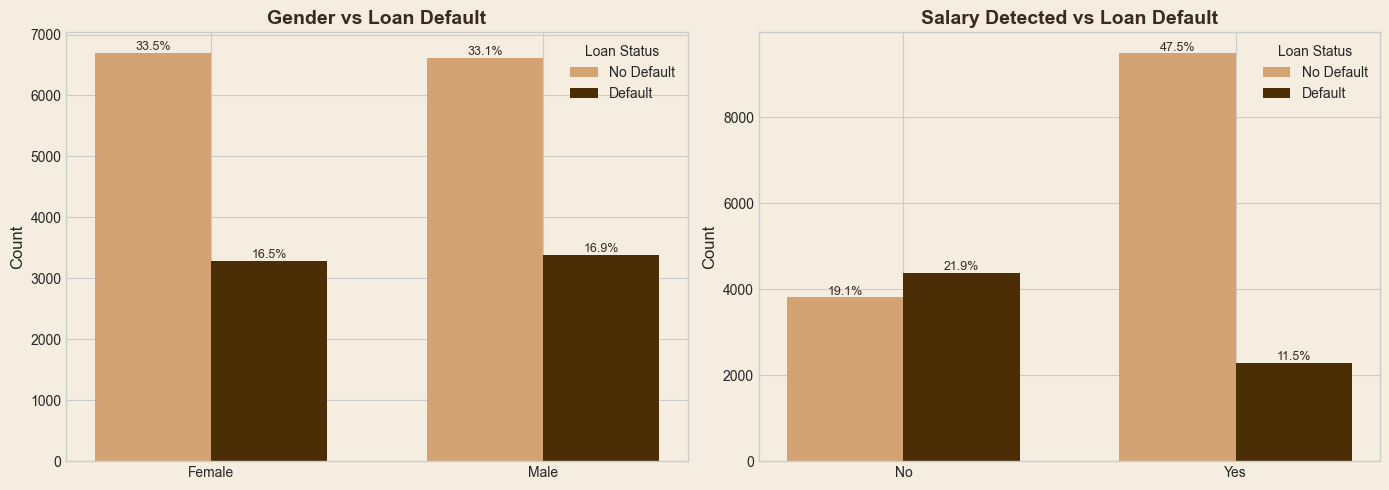

In [87]:
# Gender & Salary vs Default with percentages
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.patch.set_facecolor(BG)

for ax in axes:
    ax.set_facecolor(BG)

total = len(df)

# Gender vs Default
gender_default = df.groupby(['gender', 'loan_defaulted']).size().unstack(fill_value=0)
x = np.arange(len(gender_default.index))
width = 0.35

bars1 = axes[0].bar(x - width/2, gender_default[0], width, label='No Default', color=ACCENT)
bars2 = axes[0].bar(x + width/2, gender_default[1], width, label='Default', color=PRIMARY)
axes[0].set_title('Gender vs Loan Default', fontsize=14, fontweight='bold', color=COLORS['text_dark'])
axes[0].set_xticks(x)
axes[0].set_xticklabels(gender_default.index)
axes[0].legend(title='Loan Status')
axes[0].set_ylabel('Count', fontsize=12)

for bar in bars1:
    h = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, h + 50, f'{h/total*100:.1f}%', 
                 ha='center', fontsize=9, color=COLORS['text_dark'])
for bar in bars2:
    h = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, h + 50, f'{h/total*100:.1f}%', 
                 ha='center', fontsize=9, color=COLORS['text_dark'])

# Salary vs Default
salary_default = df.groupby(['salary_payment_detected', 'loan_defaulted']).size().unstack(fill_value=0)
x = np.arange(len(salary_default.index))

bars3 = axes[1].bar(x - width/2, salary_default[0], width, label='No Default', color=ACCENT)
bars4 = axes[1].bar(x + width/2, salary_default[1], width, label='Default', color=PRIMARY)
axes[1].set_title('Salary Detected vs Loan Default', fontsize=14, fontweight='bold', color=COLORS['text_dark'])
axes[1].set_xticks(x)
axes[1].set_xticklabels(salary_default.index)
axes[1].legend(title='Loan Status')
axes[1].set_ylabel('Count', fontsize=12)

for bar in bars3:
    h = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, h + 50, f'{h/total*100:.1f}%', 
                 ha='center', fontsize=9, color=COLORS['text_dark'])
for bar in bars4:
    h = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, h + 50, f'{h/total*100:.1f}%', 
                 ha='center', fontsize=9, color=COLORS['text_dark'])

plt.tight_layout()
plt.show()

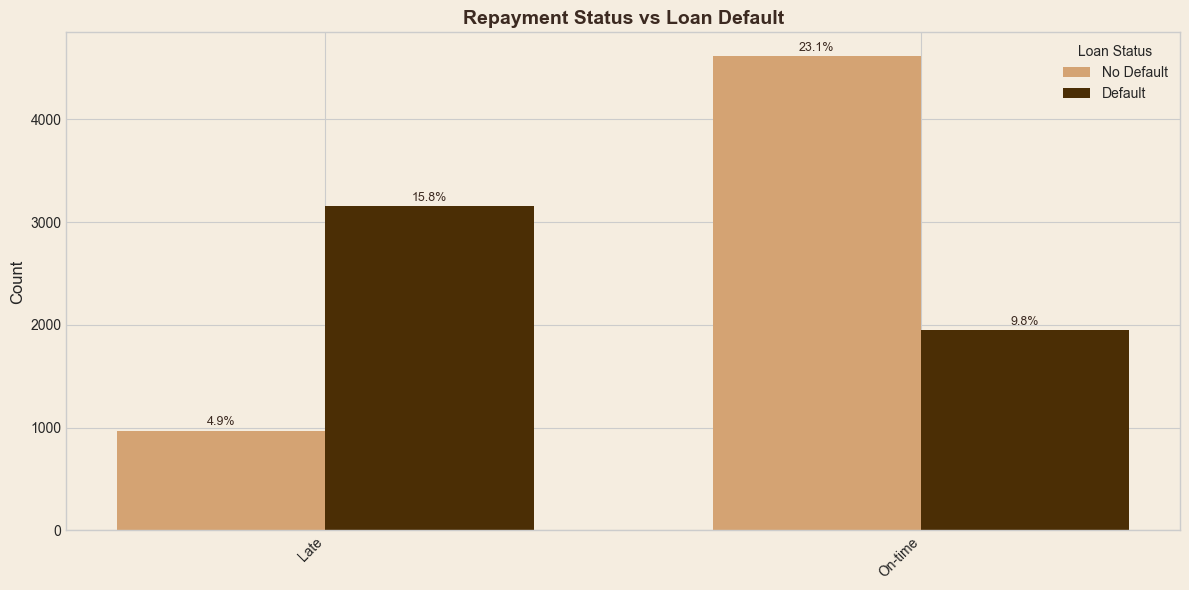

In [88]:
# Repayment status vs Default with percentages
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor(BG)
ax.set_facecolor(BG)

total = len(df)
repay_default = df.groupby(['repayment_status', 'loan_defaulted']).size().unstack(fill_value=0)
x = np.arange(len(repay_default.index))
width = 0.35

bars1 = ax.bar(x - width/2, repay_default[0], width, label='No Default', color=ACCENT)
bars2 = ax.bar(x + width/2, repay_default[1], width, label='Default', color=PRIMARY)

ax.set_ylabel('Count', fontsize=12)
ax.set_title('Repayment Status vs Loan Default', fontsize=14, fontweight='bold', color=COLORS['text_dark'])
ax.set_xticks(x)
ax.set_xticklabels(repay_default.index, rotation=45, ha='right')
ax.legend(title='Loan Status')

for bar in bars1:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, h + 50, f'{h/total*100:.1f}%', 
            ha='center', fontsize=9, color=COLORS['text_dark'])
for bar in bars2:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, h + 50, f'{h/total*100:.1f}%', 
            ha='center', fontsize=9, color=COLORS['text_dark'])

plt.tight_layout()
plt.show()

<h3 style="background-color:#7B4B2A; padding:8px 10px; font-weight:600; margin:0; color:#FFF9F4;">Default Rates by Category</h3>

<p style="background-color:#F5EDE0; padding:10px; margin:5px 0; border-left:4px solid #D4A373; color:#3C2A21;">
<strong>Insight:</strong> Strong upward trend - default rate increases sharply with gambling activity. This is a key risk factor.
</p>

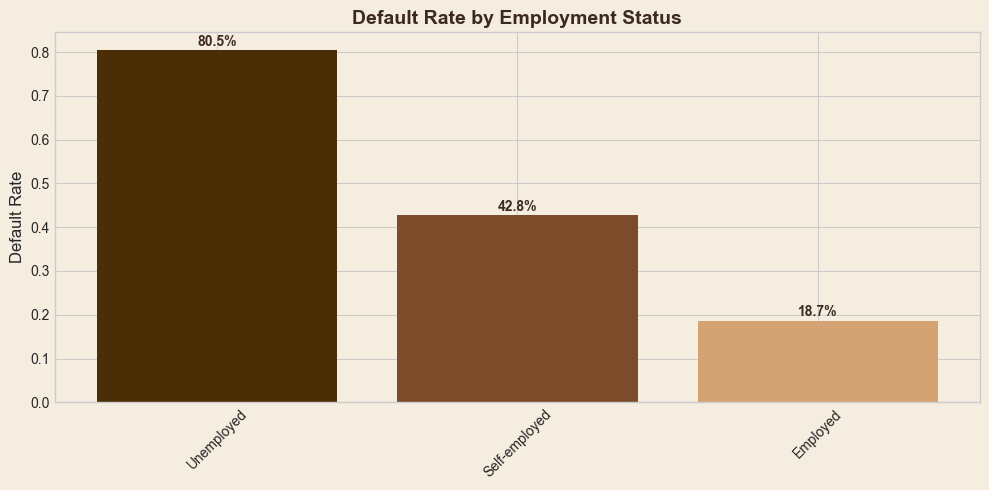

In [89]:
# Default rate by employment status
fig, ax = plt.subplots(figsize=(10, 5))
fig.patch.set_facecolor(BG)
ax.set_facecolor(BG)

default_by_emp = df.groupby('employment_status')['loan_defaulted'].mean().sort_values(ascending=False)
bars = ax.bar(default_by_emp.index, default_by_emp.values, color=[PRIMARY, SECONDARY, ACCENT, LIGHT])

ax.set_title('Default Rate by Employment Status', fontsize=14, fontweight='bold', color=COLORS['text_dark'])
ax.set_ylabel('Default Rate', fontsize=12)
ax.set_xlabel('')
ax.tick_params(axis='x', rotation=45)

# Add percentage labels
for bar, v in zip(bars, default_by_emp.values):
    ax.text(bar.get_x() + bar.get_width()/2, v + 0.01, f'{v*100:.1f}%', 
            ha='center', fontweight='bold', color=COLORS['text_dark'])

plt.tight_layout()
plt.show()

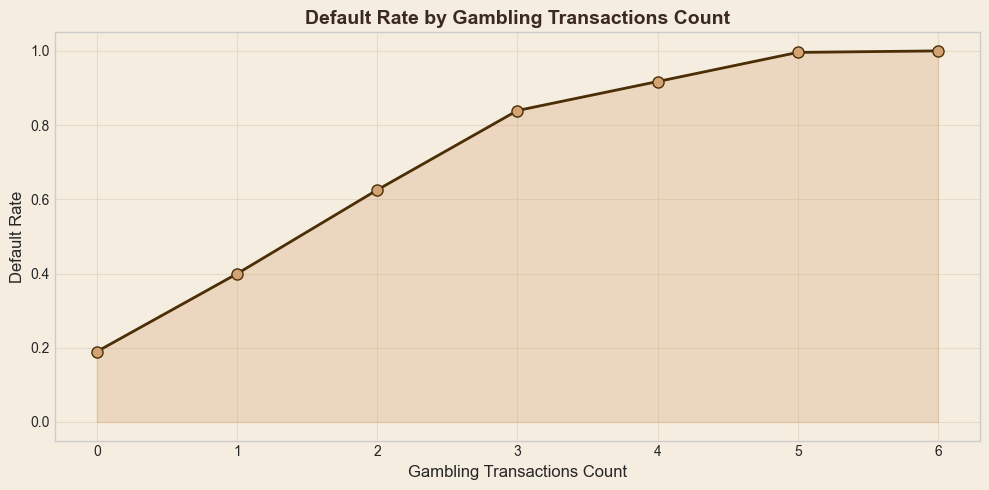

In [90]:
# Default rate by gambling count
fig, ax = plt.subplots(figsize=(10, 5))
fig.patch.set_facecolor(BG)
ax.set_facecolor(BG)

default_by_gambling = df.groupby('gambling_transactions_count')['loan_defaulted'].mean()

ax.plot(default_by_gambling.index, default_by_gambling.values, marker='o', 
        color=PRIMARY, linewidth=2, markersize=8, markerfacecolor=ACCENT, markeredgecolor=PRIMARY)
ax.fill_between(default_by_gambling.index, default_by_gambling.values, alpha=0.3, color=ACCENT)

ax.set_title('Default Rate by Gambling Transactions Count', fontsize=14, fontweight='bold', color=COLORS['text_dark'])
ax.set_ylabel('Default Rate', fontsize=12)
ax.set_xlabel('Gambling Transactions Count', fontsize=12)
ax.grid(True, alpha=0.3, color=LIGHT)

plt.tight_layout()
plt.show()

<p style="background-color:#F5EDE0; padding:10px; margin:5px 0; border-left:4px solid #D4A373; color:#3C2A21;">
<strong>Insight:</strong> Defaulters cluster in lower-income, lower-balance region. High balance users rarely default.
</p>

<h3 style="background-color:#7B4B2A; padding:8px 10px; font-weight:600; margin:0; color:#FFF9F4;">Scatter Plots</h3>

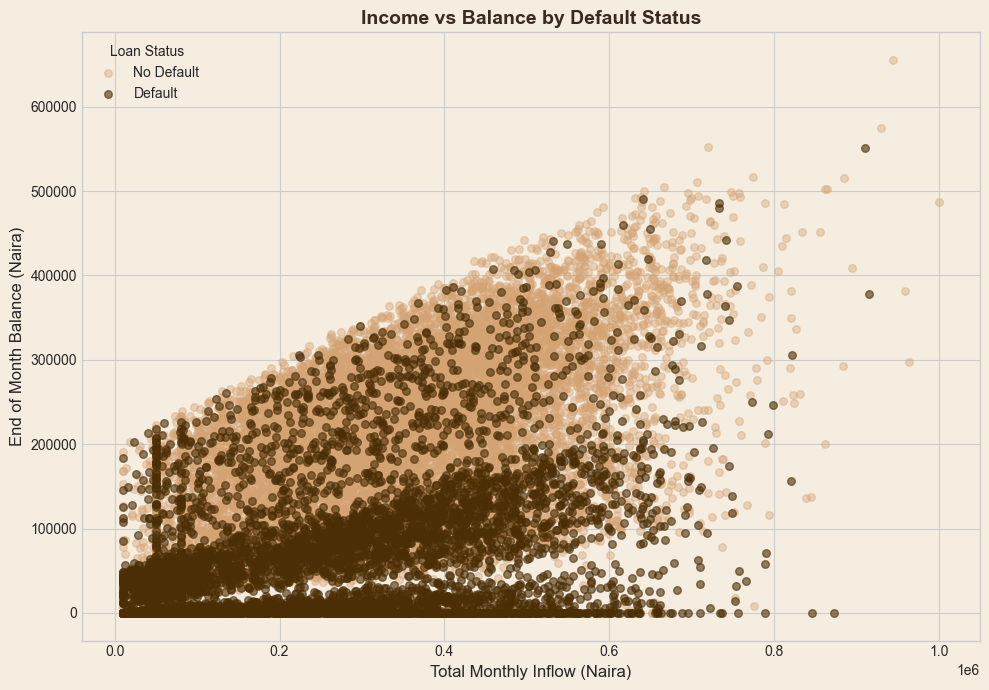

In [91]:
# Income vs Balance colored by default
fig, ax = plt.subplots(figsize=(10, 7))
fig.patch.set_facecolor(BG)
ax.set_facecolor(BG)

# Plot no-default first (background), then default (foreground)
no_default = df[df['loan_defaulted'] == 0]
default = df[df['loan_defaulted'] == 1]

ax.scatter(no_default['total_monthly_inflow'], no_default['end_of_month_balance'], 
           c=ACCENT, alpha=0.4, label='No Default', s=30)
ax.scatter(default['total_monthly_inflow'], default['end_of_month_balance'], 
           c=PRIMARY, alpha=0.6, label='Default', s=30)

ax.set_xlabel('Total Monthly Inflow (Naira)', fontsize=12)
ax.set_ylabel('End of Month Balance (Naira)', fontsize=12)
ax.set_title('Income vs Balance by Default Status', fontsize=14, fontweight='bold', color=COLORS['text_dark'])
ax.legend(title='Loan Status')

plt.tight_layout()
plt.show()

<h2 style="background-color:#4B2E05; padding:10px; font-weight:700; margin:0; color:#FFF9F4;">Summary</h2>

In [92]:
# Summary statistics
print("=" * 60)
print("EDA SUMMARY")
print("=" * 60)
print(f"\nDataset: {df.shape[0]:,} records, {df.shape[1]} features")
print(f"Target: loan_defaulted")
print(f"  - No Default: {(df['loan_defaulted']==0).sum():,} ({(df['loan_defaulted']==0).mean()*100:.1f}%)")
print(f"  - Default: {(df['loan_defaulted']==1).sum():,} ({(df['loan_defaulted']==1).mean()*100:.1f}%)")
print(f"\nMissing Values: {df.isnull().sum().sum():,} (in repayment_status only)")
print(f"Duplicates: {df.duplicated().sum()}")
print(f"\nNumerical Features: {len(numerical_cols)}")
print(f"Categorical Features: {len(categorical_cols)}")
print("=" * 60)

EDA SUMMARY

Dataset: 20,000 records, 20 features
Target: loan_defaulted
  - No Default: 13,323 (66.6%)
  - Default: 6,677 (33.4%)

Missing Values: 9,306 (in repayment_status only)
Duplicates: 0

Numerical Features: 13
Categorical Features: 6


<div style="margin:0; width:100%;">
    <h3 style="background-color:#D4A373; color:#4B2E05; padding:8px 10px; font-weight:700; margin:0;">Key Findings for Model Development</h3>
    <ul style="background-color:#F5EDE0; padding:15px 25px; color:#3C2A21; font-family:Arial, sans-serif; margin:0;">
        <li><strong>Top Predictors:</strong> missed_payment_count, end_of_month_balance, gambling_transactions_count</li>
        <li><strong>Class Imbalance:</strong> 2:1 ratio (66.6% vs 33.4%) - consider SMOTE or class weights</li>
        <li><strong>Missing Data:</strong> repayment_status missing for users without previous loans - handle appropriately</li>
        <li><strong>Feature Engineering:</strong> Create savings_rate, debt_to_income ratio for better predictions</li>
        <li><strong>Next Step:</strong> Phase 1D - Data Preprocessing</li>
    </ul>
</div>